In [1]:
from __future__ import division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
import math, random
import matplotlib.pyplot as plt
%matplotlib inline

def reset_graph(seed = 42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [2]:
reset_graph()
np.random.seed(42)
n_hidden1 = 40
n_hidden2 = 2
n_inputs = 1000
n_outputs = 1
train_split = .8
batch_size = 10
n_epochs = 1001

In [3]:
# randn takes the dimensions of the returned array as the parameters
def function_to_learn(x):
    return 2 * np.sin(1 - x) # + 0.125 * np.random.randn(*x.shape)

In [4]:
all_x = np.float32(np.random.uniform(0, 10, (1, n_inputs))).T
# all_x_fdd = numpy.diff(all_x)
np.random.shuffle(all_x)
train_size = int(n_inputs * train_split)
# trainx = random.sample(all_x, train_size)
trainx = all_x[:train_size]
validx = all_x[train_size:]
trainy = function_to_learn(trainx)
validy = function_to_learn(validx)

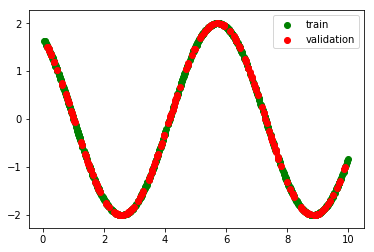

In [5]:
plt.figure(1)
plt.scatter(trainx, trainy, c = 'green', label = 'train')
plt.scatter(validx, validy, c = 'red', label = 'validation')
plt.legend()

In [6]:
X = tf.placeholder(tf.float32, shape = (None, 1), name = "X")
y = tf.placeholder(tf.float32, shape = None, name = "y")

In [7]:
with tf.name_scope("function_approximator"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu, name = "hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu, name = "hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name = "outputs")

In [8]:
# with tf.name_scope("function_approximator"):
#     hidden1_1 = tf.layers.dense(X, n_hidden1_1, activation = tf.nn.relu, name = "hidden1_1")
#     hidden1_2 = tf.layers.dense(X, n_hidden1_2, activation = tf.nn.relu, anem = "hidden1_2")
#     hidden2_1 = tf.layers.dense(hidden1_1, n_hidden2_1, activation = tf.nn.relu, name = "hidden2_1")
#     hidden2_2 = tf.layers.dense(hidden1_2, n_hidden2_2, activation = tf.nn.relu, name = "hidden2_2")
#     logits = tf.layers.dense(hidden1, n_outputs, name = "outputs")

In [9]:
with tf.name_scope("loss"):
    loss = tf.nn.l2_loss(logits - y)

In [10]:
learning_rate = 0.01

with tf.name_scope("train"):
#     optimizer = tf.train.FtrlOptimizer(learning_rate)
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [11]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [12]:
with tf.name_scope("eval"):
    mse = tf.nn.l2_loss(logits - validy)

In [13]:
with tf.Session() as sess:
    init.run()
    errors = []
    for epoch in range(n_epochs):
        for start, end in zip(range(0, len(trainx), batch_size), range(batch_size, len(trainx), batch_size)):
            X_batch = trainx[start:end]
            y_batch = trainy[start:end]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        mse_test = sess.run(mse, feed_dict = {X: validx})
        errors.append(mse_test)
        if epoch % 100 == 0:
            print("Epoch:", epoch, "Validation accuracy:", mse_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

Epoch: 0 Validation accuracy: 189.255
Epoch: 100 Validation accuracy: 12.4077
Epoch: 200 Validation accuracy: 0.942248
Epoch: 300 Validation accuracy: 1.03593
Epoch: 400 Validation accuracy: 0.979464
Epoch: 500 Validation accuracy: 0.93186
Epoch: 600 Validation accuracy: 0.946012
Epoch: 700 Validation accuracy: 0.913171
Epoch: 800 Validation accuracy: 0.852827
Epoch: 900 Validation accuracy: 0.760079
Epoch: 1000 Validation accuracy: 0.714454


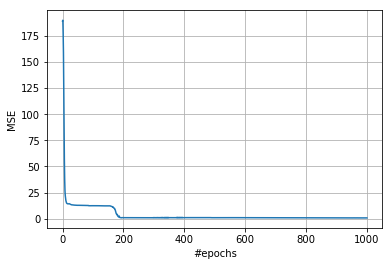

In [14]:
plt.plot(errors)
plt.xlabel('#epochs')
plt.ylabel('MSE')
plt.grid(True)

In [15]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")
    print(tf.trainable_variables())

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
[<tf.Variable 'hidden1/kernel:0' shape=(1, 40) dtype=float32_ref>, <tf.Variable 'hidden1/bias:0' shape=(40,) dtype=float32_ref>, <tf.Variable 'hidden2/kernel:0' shape=(40, 2) dtype=float32_ref>, <tf.Variable 'hidden2/bias:0' shape=(2,) dtype=float32_ref>, <tf.Variable 'outputs/kernel:0' shape=(2, 1) dtype=float32_ref>, <tf.Variable 'outputs/bias:0' shape=(1,) dtype=float32_ref>]
